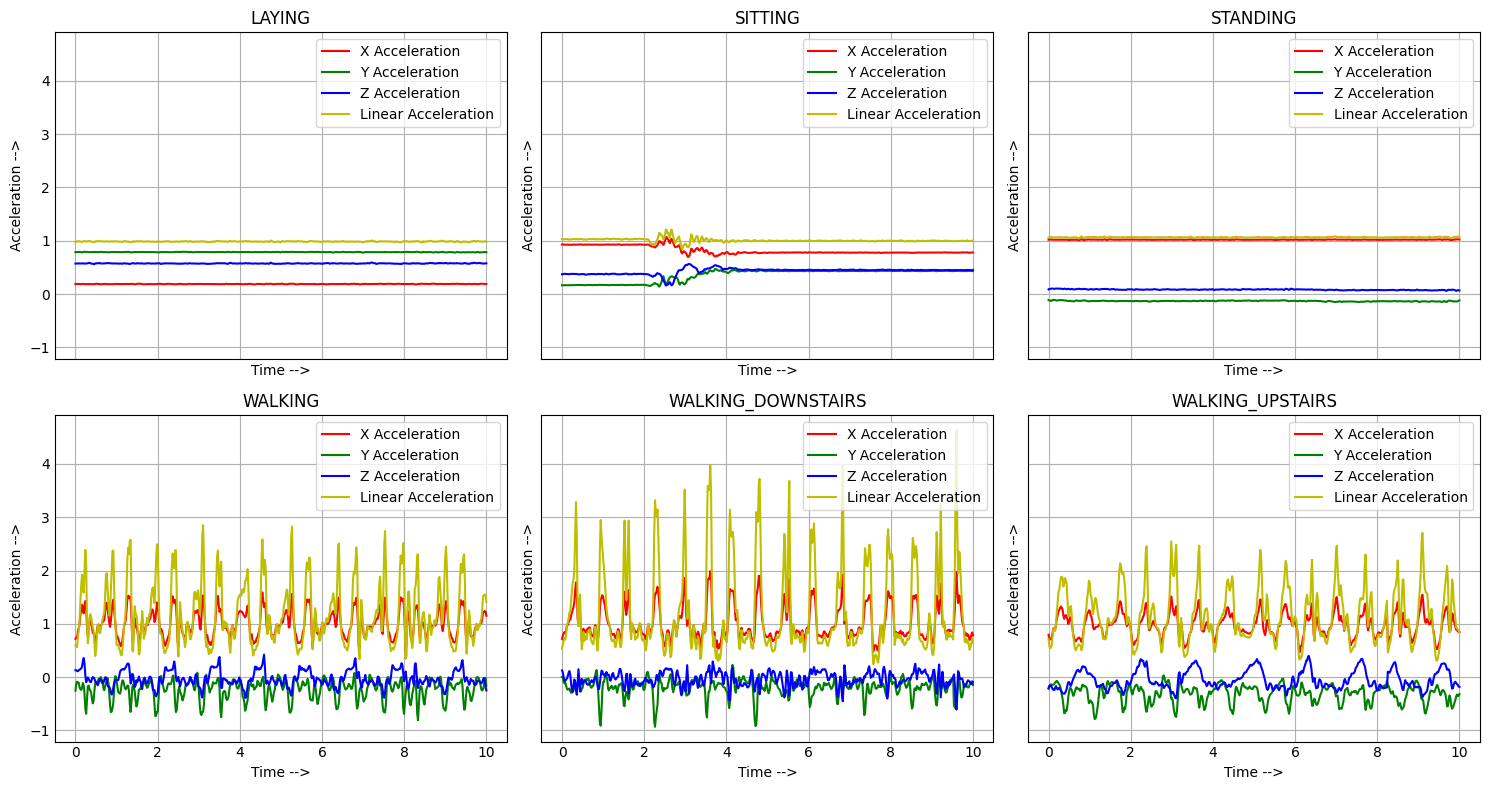

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Subject_data = {}
combined_dir = os.path.join(r"..\Combined")
subject = input("Enter the subject: (eg: Subject_26 or Subject_02): ")
if (int(subject[-2:]) in [2,4,9,10,12,13,18,20,24]):
    dataset_dir = os.path.join(combined_dir,"Test")
else:
    dataset_dir = os.path.join(combined_dir,"Train")
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

for folder in folders:
    file = "Subject_"+str(int(subject[-2:]))+".csv"
    df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
    df = df[100:600]
    Subject_data[folder] = df.values

time = np.linspace(0,10,500)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Plotting Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

plt.style.use('_mpl-gallery')

fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)

for i in range(2):
    for j in range(3):
        axs[i, j].plot(time, Subject_data[folders[3*i+j]][:,0], label='X Acceleration', color='r')
        axs[i, j].plot(time, Subject_data[folders[3*i+j]][:,1], label='Y Acceleration', color='g')
        axs[i, j].plot(time, Subject_data[folders[3*i+j]][:,2], label='Z Acceleration', color='b')
        axs[i, j].plot(time, Subject_data[folders[3*i+j]][:,0]**2 + Subject_data[folders[3*i+j]][:,1]**2 + Subject_data[folders[3*i+j]][:,2]**2, label='Linear Acceleration', color='y')
        axs[i, j].set_title(folders[3*i+j])
        axs[i, j].set_xlabel('Time -->')
        axs[i, j].set_ylabel('Acceleration -->')

# Adding legends and adjusting layout
for ax in axs.flat:
    ax.legend()
fig.tight_layout()

# Display the plot
plt.show()

---
We are easly able to see the similarities in the waveforms of statitc and dynamic activities.   
The static activities have less fluctuating graphs than the dynamic ones.  

---
From the waveform, we believe that the model will be able to distinguish between dynamic and static activities with much easy as compared to distinguishing activities from either sets. 